In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import special_ortho_group
import seaborn as sns
import pandas as pd

# Goal 
To generate data (6 distinct groups) with trajectory in time

data_structure = [[n_1 data], [n_2 data]]

In [80]:
# c = number of class
# t = timepoints
# d = dimention of data
# a = amplitude

c = 6
t = 1000
d = 2
to_d = 10
a = 1

In [81]:
theta = np.linspace(0, 2*np.pi, c+1)
theta = theta[:-1]
theta


array([0.        , 3.14159265])

In [82]:
def find_coords(theta, class_num):
    x = a * np.cos(theta[class_num])
    y = a * np.sin(theta[class_num])
    return [x, y]

def transformation_to_n_dim(data, from_d, to_d):
    new_data = np.zeros((data.shape[0], to_d, data.shape[2]))

    for i in range(data.shape[0]):
        for j in range(data.shape[2]):
            # print(data[i, :, j].shape)
            new_data[i, :, j] = np.hstack((data[i, :, j], np.zeros(to_d - from_d)))
    
    return new_data

random_rotation_matrix = special_ortho_group.rvs(to_d, random_state=42)

def rotation(data, seed = 42, d = to_d, random_rotation_matrix = random_rotation_matrix):
    random_rotated = np.zeros((data.shape[0], to_d, data.shape[2]))
    for i in range(data.shape[0]):
        for j in range(data.shape[2]):
            random_rotated[i, :, j] = np.matmul(data[i, :, j], random_rotation_matrix)

    return random_rotated

def rotation_matrix(matrix, degree):
    deg = np.radians(degree)
    rotation_operation = np.array([[np.cos(deg), -np.sin(deg)], [np.sin(deg), np.cos(deg)]])
    product = rotation_operation @ matrix
    return product

In [83]:
data = np.zeros((c, d, t))

In [84]:
# Initial location
for i in range(c):
    data[i, :, 0] = find_coords(theta, i)
    print(find_coords(theta, i))    

[np.float64(1.0), np.float64(0.0)]
[np.float64(-1.0), np.float64(1.2246467991473532e-16)]


In [85]:
for i in range(t):
    if i == 0:
        continue
    for j in range(c):
        data[j, :, i] = rotation_matrix(data[j, :, i-1], 1)* 1.001 + np.random.normal(0, 0.01, (1, d))

Text(0.5, 0, 'Time')

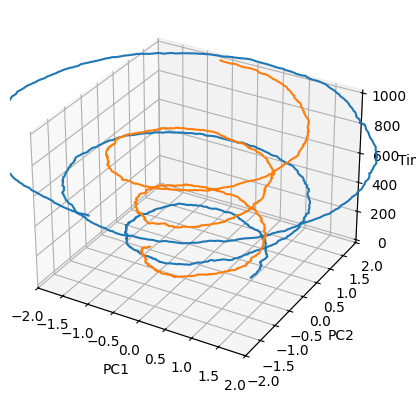

In [86]:
ax = plt.figure().add_subplot(projection='3d')

for i in range(c):
    ax.plot(data[i, 0, :], data[i, 1, :], range(t))

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Time')



In [87]:
print(data[0, :, 0])

[1. 0.]


In [88]:
new_data = transformation_to_n_dim(data, d, to_d)
new_data.shape

(2, 10, 1000)

In [89]:
new_data[0, :, 2]

array([1.00215111, 0.04157376, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [90]:
rotated = rotation(new_data)

In [91]:
rotated.shape

(2, 10, 1000)

In [92]:
rotated[0, :, 2]

array([-0.19435323,  0.17354127,  0.21360595,  0.21349474,  0.50470977,
       -0.22707362,  0.1610127 , -0.32747715, -0.09161817, -0.63173043])

Text(0.5, 0, 'Time')

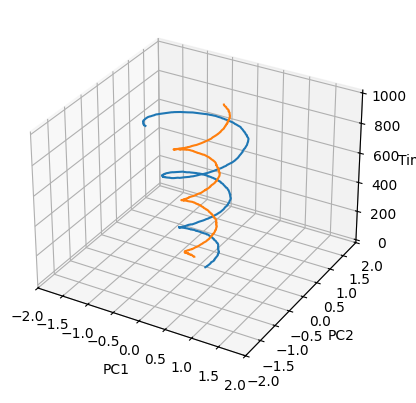

In [93]:
ax = plt.figure().add_subplot(projection='3d')

for i in range(c):
    ax.plot(rotated[i, 1, :], rotated[i, 8, :], range(t))

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Time')


Text(0.5, 0, 'Time')

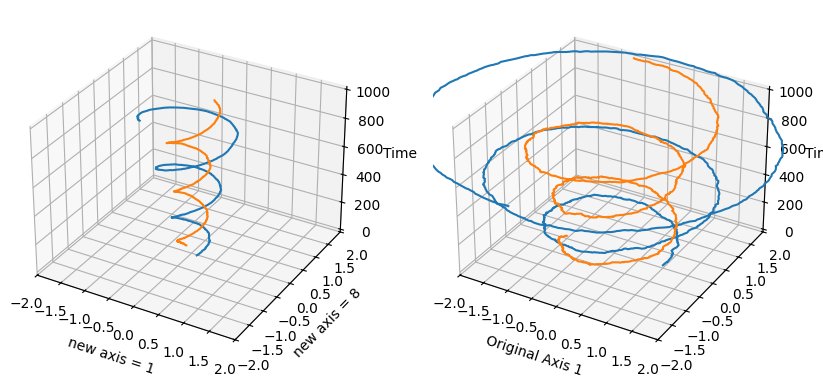

In [94]:
rotated_axis_a = 1
rotated_axis_b = 8

fig, ax = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'projection': '3d'})

# ax[0] = plt.figure().add_subplot(projection='3d')

for i in range(c):
    ax[0].plot(rotated[i, rotated_axis_a, :], rotated[i, rotated_axis_b, :], range(t))

ax[0].set_xlim([-2, 2])
ax[0].set_ylim([-2, 2])
ax[0].set_xlabel('new axis = ' + str(rotated_axis_a))
ax[0].set_ylabel('new axis = ' + str(rotated_axis_b))
ax[0].set_zlabel('Time')

# ax[1] = plt.figure().add_subplot(projection='3d')
for i in range(c):
    ax[1].plot(data[i, 0, :], data[i, 1, :], range(t))

ax[1].set_xlim([-2, 2])
ax[1].set_ylim([-2, 2])
ax[1].set_xlabel('Original Axis 1')
ax[1].set_zlabel('Time')


Text(0.5, 0, 'Original axis 1-2')

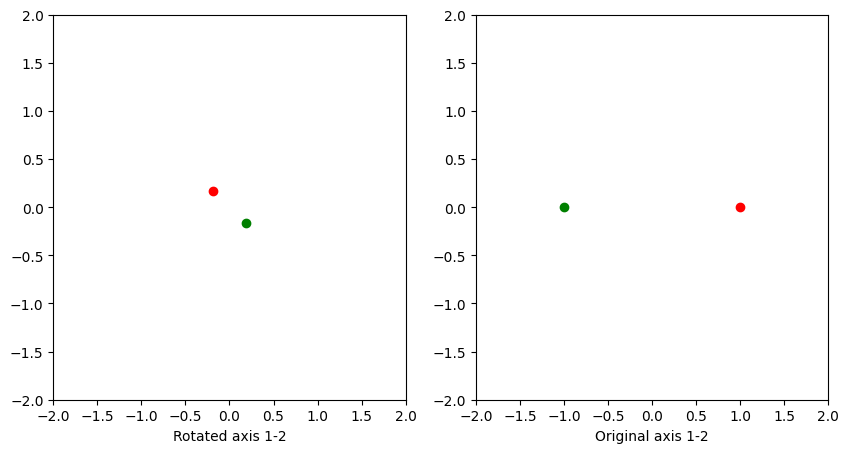

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
color = ['r', 'g', 'b', 'y', 'c', 'm']

for i in range(c):
    ax[0].scatter(rotated[i, 0, 0], rotated[i, 1, 0], color = color[i])
    ax[1].scatter(data[i, 0, 0], data[i, 1, 0], color = color[i])

ax[0].set_xlim([-2, 2])
ax[0].set_ylim([-2, 2])
ax[0].set_xlabel('Rotated axis 1-2')

ax[1].set_xlim([-2, 2])
ax[1].set_ylim([-2, 2])
ax[1].set_xlabel('Original axis 1-2')

IndexError: index 2 is out of bounds for axis 0 with size 2

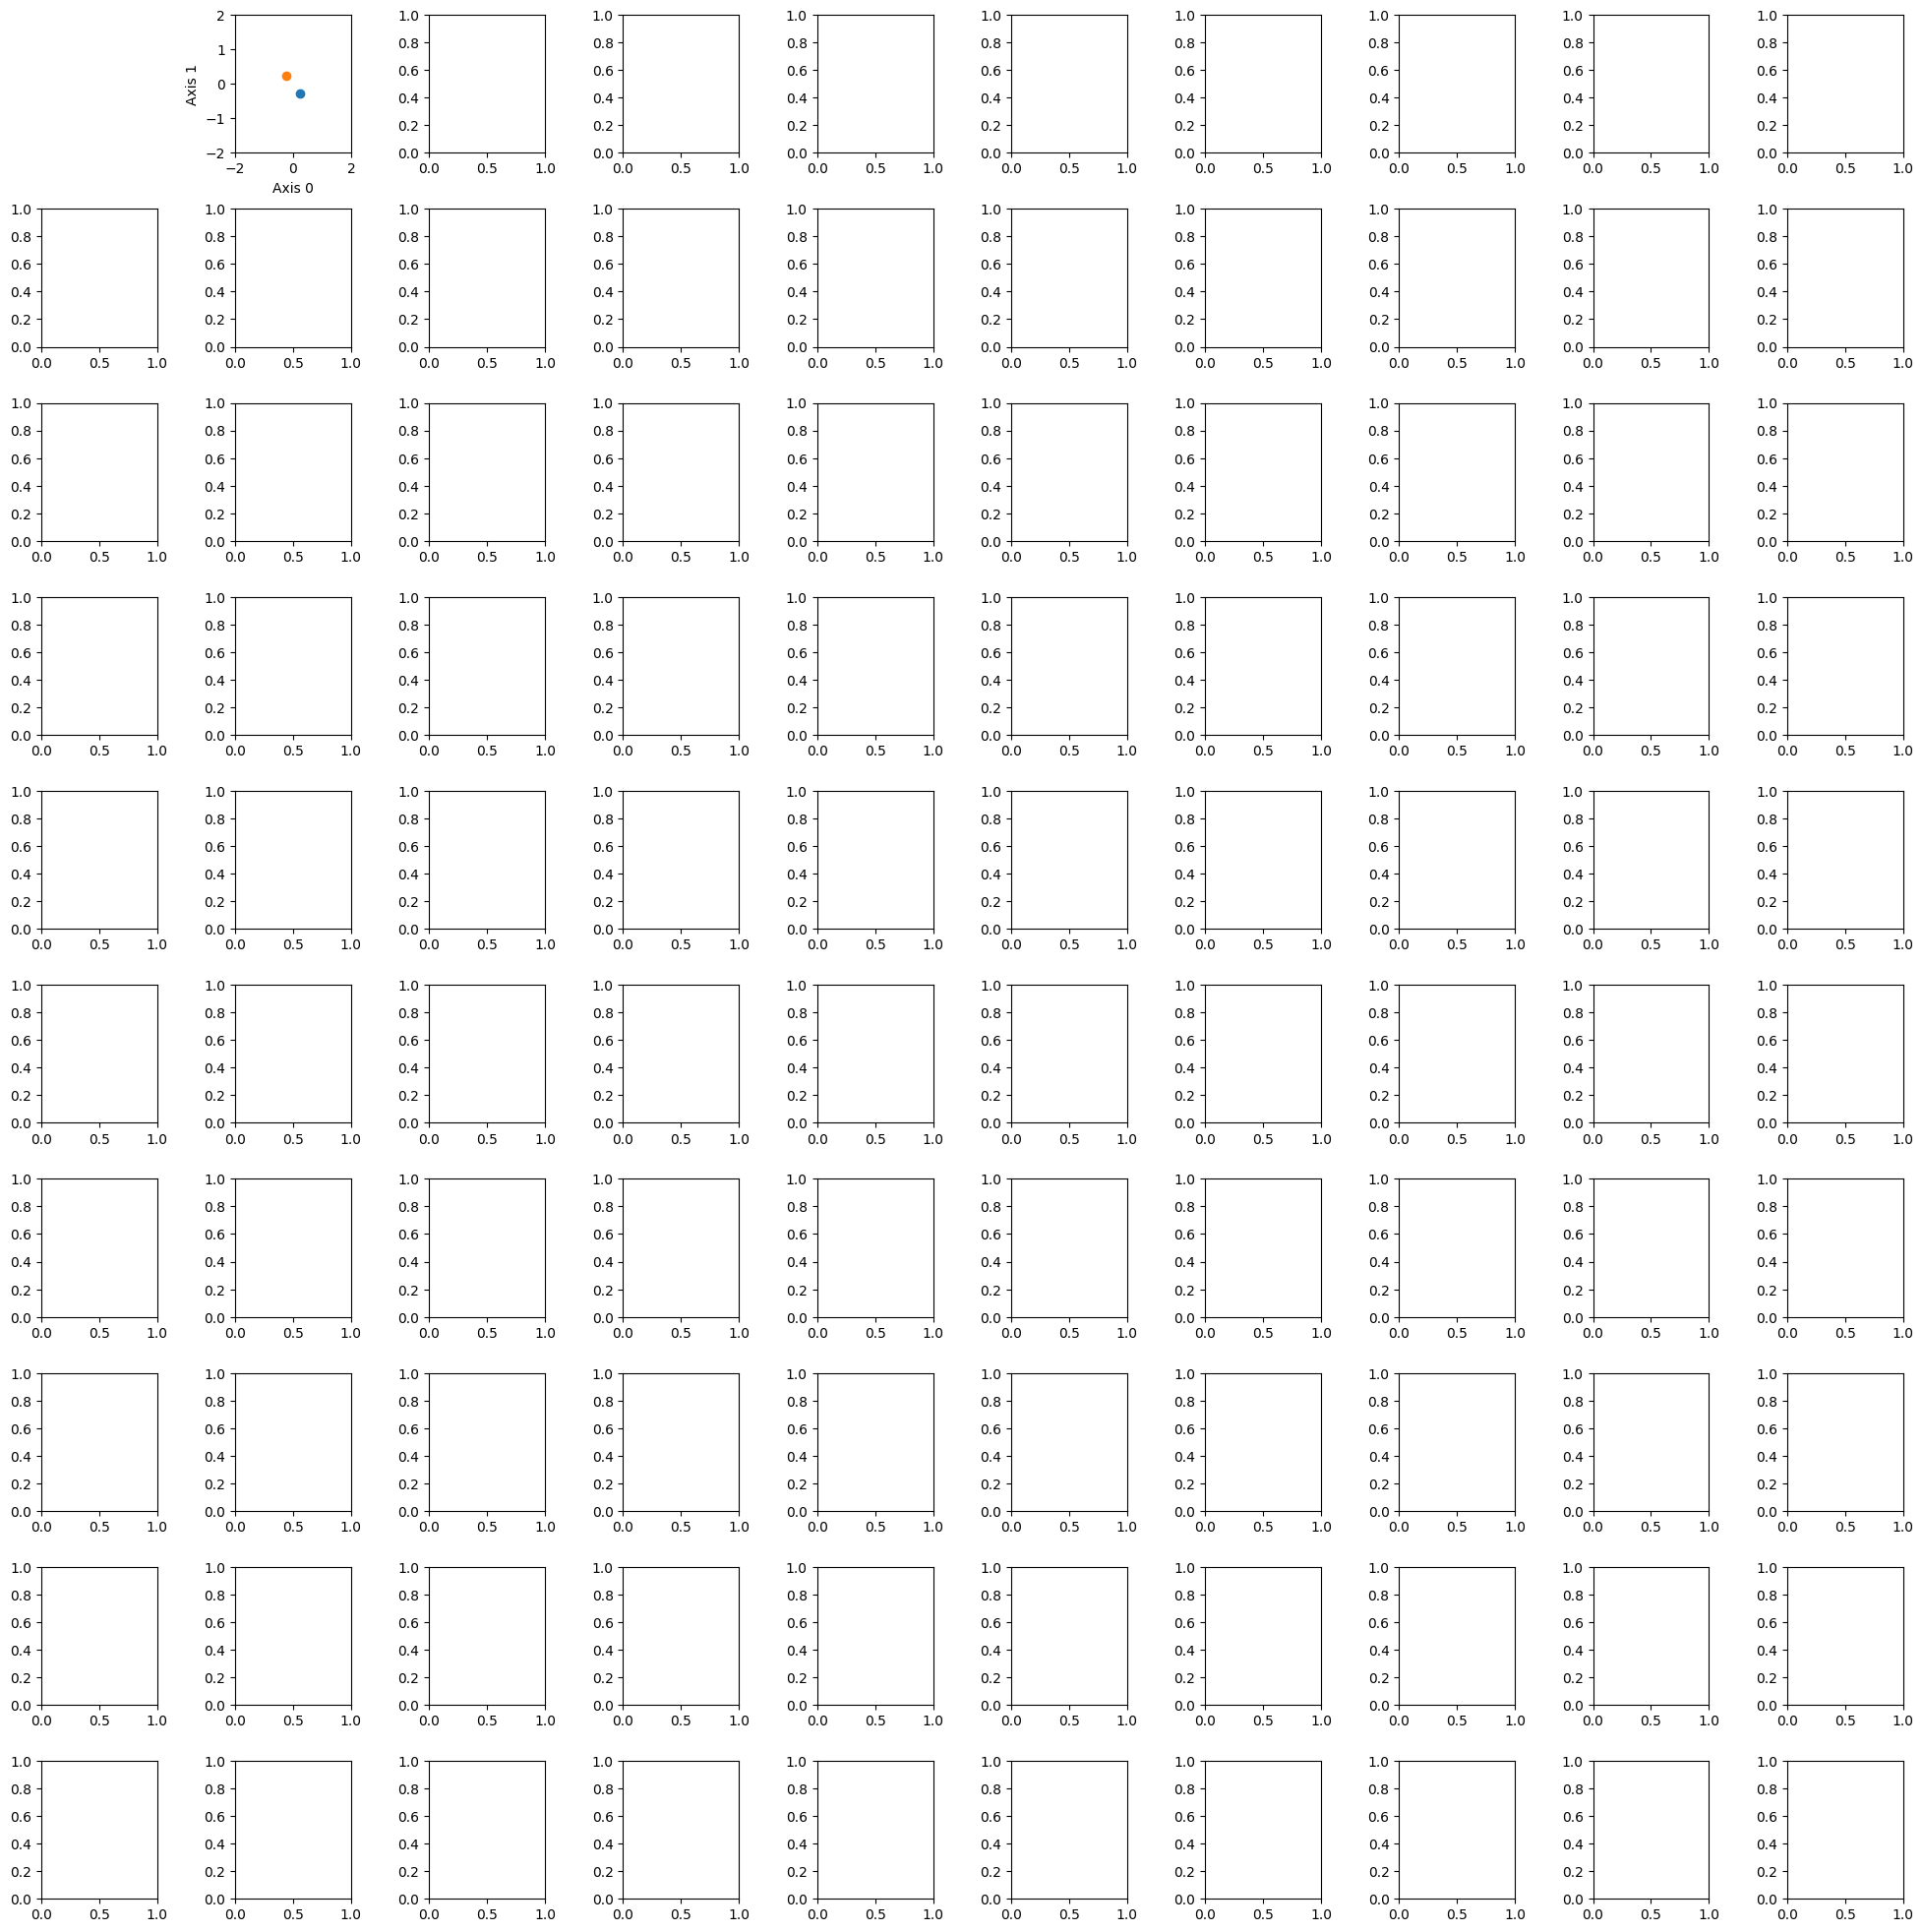

In [96]:
fig, ax = plt.subplots(10, 10, figsize=(20, 20))
fig.tight_layout(pad=2.0)

inspect_time = 200

for i in range(10):
    for j in range(10):
        for k in range(6):
            if i != j:
                ax[i, j].scatter(rotated[k, i, inspect_time], rotated[k, j, inspect_time])
                ax[i, j].set_xlim([-2, 2])
                ax[i, j].set_ylim([-2, 2])
                ax[i, j].set_xlabel(f'Axis {i}')
                ax[i, j].set_ylabel(f'Axis {j}')
            else:
                ax[i, j].axis('off')  # Turn off the diagonal subplots

plt.show()

In [ ]:
np.save('explode-rotated.npy', rotated)

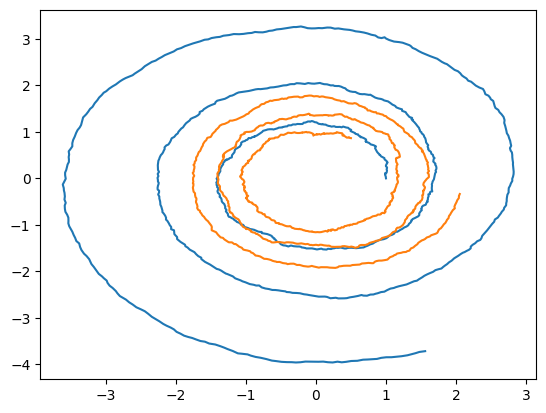

In [ ]:
for i in range(2):
    plt.plot(data[i, 0, :], data[i, 1, :])

In [ ]:
def generate_data(c, t, d, to_d, a, theta):
    data = np.zeros((c, d, t))

    # Initial location
    for i in range(c):
        data[i, :, 0] = find_coords(theta, i)
        # print(find_coords(theta, i))    
    
    for i in range(t):
        if i == 0:
            continue
        for j in range(c):
            data[j, :, i] = rotation_matrix(data[j, :, i-1], 1)* 1.001 + np.random.normal(0, 0.01, (1, d))
    
    data = transformation_to_n_dim(data, d, to_d)

    rotated = rotation(data)

    return rotated
    

In [ ]:
from sklearn.decomposition import PCA
data_train = []
data_test = []

(10, 66)
(2, 66)


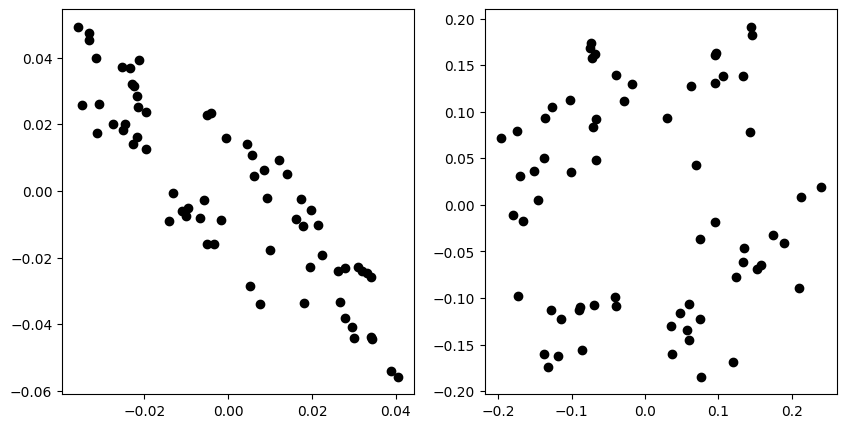

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
def generate_to_plot_PCA_average():
    gen_data = generate_data(c, t, d, to_d, a, theta)
    average = np.zeros((c, to_d))

    color = ['orange', 'black', 'green', 'blue', 'red', 'purple']
    pca = PCA(n_components=5)


    all_data = np.hstack((gen_data[0, :5, :], gen_data[1, :5, :], gen_data[2, :5, :], gen_data[3, :5, :], gen_data[4, :5, :], gen_data[5, :5, :]))
    # print(all_data.shape)

    for i in range(c):
        average[i, :] = np.mean(gen_data[i, :, :], axis = 1)
        # print(average[i, :].shape)
        # ax[0].scatter(average[i, 0], average[i, 1], color = color[i])
        # ax[0].plot(average[i, :], average[i, :], color = color[i])
        # ax[0].set_xlabel('Randomly pick 1 dimension')
        # ax[0].set_ylabel('Randomly pick 1 dimension')
    
    return average

    for i in range(c):
        epoch_data = gen_data.shape[2]
        recovered_data = pca.fit_transform(all_data.T).T
        print(recovered_data.shape)

        ax[1].plot(recovered_data[0, i*epoch_data:(i+1)*(epoch_data)], recovered_data[1, i*epoch_data:(i+1)*(epoch_data)], color = color[i])
        ax[1].set_xlabel('PC 1')
        ax[1].set_ylabel('PC 2')

    for i in range(c):
        average[i, :] = np.mean(gen_data[i, :, :], axis = 1)
        
    # print(average.shape)
    pca = PCA(n_components=2)
    recovered_data_1 = pca.fit_transform(average)

    # print(recovered_data_1.shape)


    
    # plt.scatter(average[:, 0], average[:, 1], color = color)

    for i in range((recovered_data_1.shape[0])):
        data_train.append(recovered_data_1[i, :])
        data_test.append(i)


    

for i in range(10):
    if i == 0:
        average_accum = generate_to_plot_PCA_average().T
    
    average = generate_to_plot_PCA_average().T
    average_accum = np.hstack((average_accum, average))


print(average_accum.shape)
pca = PCA(n_components=2)
recovered_data_1 = pca.fit_transform(average_accum.T).T
print(recovered_data_1.shape)

ax[0].scatter(average_accum[0, :], average_accum[1, :], color = 'black')
ax[1].scatter(recovered_data_1[0, :], recovered_data_1[1, :], color = 'black')
plt.show()
 

(-2.0, 2.0)

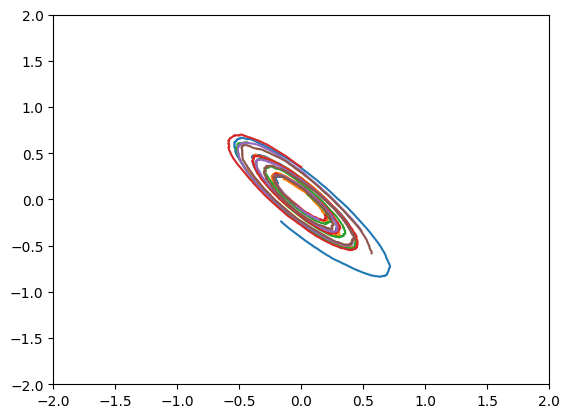

In [ ]:
data = generate_data(c, t, d, to_d, a, theta)
data.shape

plt.plot(data[0, 0, :], data[0, 1, :])
plt.plot(data[1, 0, :], data[1, 1, :])
plt.plot(data[2, 0, :], data[2, 1, :])
plt.plot(data[3, 0, :], data[3, 1, :])
plt.plot(data[4, 0, :], data[4, 1, :])
plt.plot(data[5, 0, :], data[5, 1, :])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
